[MachinaFantasma](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)


# Basic Data Analysis and Visualization (with Pandas)

## Getting started

Python tools are usually organized as *libraries*.

Just like a real-world library (図書館 or 도서관), A Python library is organized into classes which contains modules and functions.



Below we import a few libraries or specific modules from libraries:

In [1]:
# MATPLOTLIB Plotting library:
import matplotlib.pyplot as plt

# PANDAS - a data structure and analysis tool
import pandas as pd

# SEABORN - high-level (easy to use) stats visualization tool
import seaborn as sns

# INTERACT module from IPYWIDGETS for creating interactive graphics
from ipywidgets import interact

In [2]:
%matplotlib inline

Do you observe two things from the above?

1. Libraries tend to have easy to remember names, but they are sometimes long. Hence we import them as shortnames. 

    (Just like although my name is Timothy, back in Australia, people call me Tim.)

    The syntax above was of the form ``import LONG_LIBRARY_NAME`` as ``shortname``
    
2. We sometimes don't need to import the entire library, just a subset of it, like the last example above.

## Importing data

Let's work with a concrete example:

We want to import some data about countries and their long-run macroeconomic outcomes. 

Original data source: [World Penn Tables data](http://www.rug.nl/ggdc/docs/pwt90.dta) provided through the [Gronigen Growth and Development Centre](https://www.rug.nl/ggdc/). 

This example was adapted from [Jon Conning's material](https://github.com/jhconning/Dev-II).


Let's download the data ...

In [3]:
# Escape to server shell (!) and use WGET to download to current directory
!wget -L "https://github.com/jhconning/Dev-II/blob/master/notebooks/data/country.dta?raw=true" -O country.dta

--2020-09-02 11:56:36--  https://github.com/jhconning/Dev-II/blob/master/notebooks/data/country.dta?raw=true
Resolving github.com (github.com)... 52.64.108.95
Connecting to github.com (github.com)|52.64.108.95|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jhconning/Dev-II/raw/master/notebooks/data/country.dta [following]
--2020-09-02 11:56:36--  https://github.com/jhconning/Dev-II/raw/master/notebooks/data/country.dta
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jhconning/Dev-II/master/notebooks/data/country.dta [following]
--2020-09-02 11:56:36--  https://raw.githubusercontent.com/jhconning/Dev-II/master/notebooks/data/country.dta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.80.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.80.133|:443... connected.
HTTP request sent, awaiting 

So this data set is stored in some file with a ``.dta`` extension.

It turns out this is some data format designed for software like ``STATA``.

``Pandas`` can read this:

In [4]:
# import data as a Pandas dataframe:
# df = pd.read_stata("country.dta")
df = pd.io.stata.read_stata("country.dta")

In [5]:
# Display dataframe content
df

,isocode,country,cont,ggdp,gpop,open60,sav60,lxrd60,lxrdav,savav,openav,lgdp60,lpop60
0,GHA,Ghana,Africa,2.990764,2.577389,67.866135,60.527485,0.852252,0.600432,13.394326,42.227081,-0.634748,1.939933
1,MAR,Morocco,Africa,2.453598,2.214207,46.277290,9.332626,0.503584,0.918777,11.590545,47.401264,0.515019,2.519584
2,COM,Comoros,Africa,-0.014582,2.878329,57.538712,6.700409,1.902229,1.482772,11.446098,57.030586,0.555129,-1.698821
3,MLI,Mali,Africa,0.755422,2.165016,42.134323,4.308089,1.916554,1.203254,8.405947,48.412022,0.020564,1.500997
4,GAB,Gabon,Africa,1.268704,2.521714,72.452179,20.357958,1.315058,0.710294,7.738871,94.919189,2.073140,-0.807430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,CHL,Chile,S. America,1.848451,1.730081,29.795073,29.349722,0.650374,0.655199,18.732784,43.862640,1.846538,2.026219
93,DOM,Dominican Republic,S. America,2.663763,2.374352,68.969223,5.131092,0.606269,0.755264,10.170477,76.201607,0.998264,1.172943
94,BRB,Barbados,S. America,1.812256,0.411359,98.748535,5.806423,1.417267,0.932263,4.997591,114.205284,2.162862,-1.459558
95,URY,Uruguay,S. America,1.352161,0.688982,17.299664,14.389812,0.324334,0.583185,13.030991,33.351215,1.965475,0.928602


## All Countries

**What is "living standard?** Let's look at one measure of *living standard*: the per-person national income.

* Often measured as Real GDP per person.

* This is not necessarily the best notion of "living standard", but a useful, rough starting point.

**Question to ask**: Is there long-run convergence in *living standards* across country?

Let's look at the data for all the countries in the Penn World Tables dataset.

Here we plot a scattergram between

* Initial per person real GDP in 1960, and,

* average growth in real GDP between 1960 and 2000 (vertical axis).

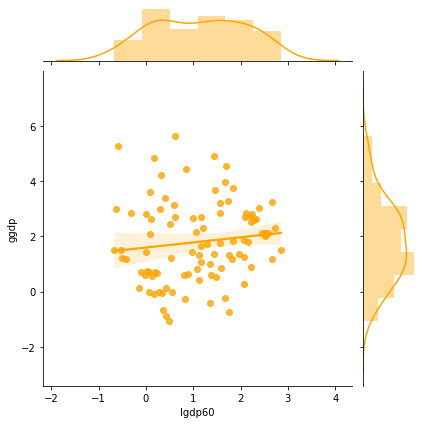

In [6]:
g = sns.jointplot("lgdp60", "ggdp", 
                  data=df, 
                  kind="reg",
                  color ="orange")

## All but African countries

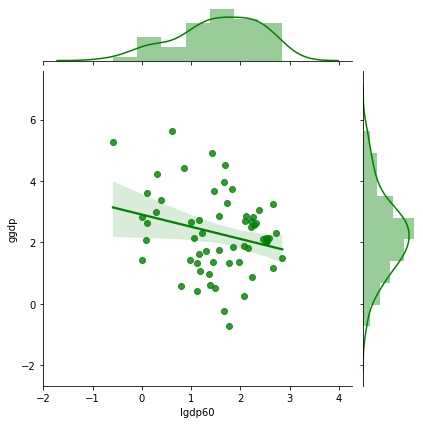

In [7]:
g = sns.jointplot("lgdp60", "ggdp", 
                  data=df[df.cont !="Africa"], 
                  kind="reg",
                  color ="green")

## Interactive app

Let's use the ``ipywidget`` library to create interactive plots by continents or regions.

First we define a function that will reproduce similar growth convergence scattergrams like earlier for any input of a ``region``.



In [8]:
def scattermeister(region):
    sns.jointplot("lgdp60", "ggdp", data=df[df.cont == region],
                  kind="reg", color ="green", height=7)

The definition of a ``region`` will depend on our dataframe i.e., the ``df`` object we created at the start.

Now, let generate the interactive plot ... 

* Note: This won't work on Azure. 

* It will only work in your local Jupyter Notebook server (i.e., the one you installed on your own computer)

In [9]:
interact(scattermeister, region=list(df.cont.unique()))
plt.show()

interactive(children=(Dropdown(description='region', options=('Africa', 'Asia', 'Europe & N. America', 'S. Ame…

## Economic implication of the empirical regularities?

Empirical regularity:

* For most regions (Asia, Europe and North America, South America), initial living standard (i.e., 1960 per person GDP) is negatively correlated with average growth rate between 1960 and 2000.

* Such a pattern is not apparent in the case the Africa an economic region.

Hypothesis:
   
* There is *growth convergence* among countries in each group of Asia, Europe and North America, and South America.

* There is a lack of convergence in Africa.

Candidate theories:

* Solow-Swan (1956) model

* Optimal growth models:

    * Ramsey (1928), Cass, Koopmans (1965)
    
    * Diamond (1965) overlapping generations (OLG) model
    
These models imply that for economies with the same or similar fundamentals (taste, technology and market institutions) they should end up moving along the same growth path in the long run.

According to these models, lack of convergence has to do with a fundamental difference: e.g., difference in total factor productivity (a.k.a., difference in technological progress).

## Lookahead (next week)

* A basic Solow-Swan model of growth

* An extension to the Diamond OLG model of growth

* Skills to learn:
    
    * Applying consumer and firm decision theory and Walrasian (competitive) equilibrium in OLG model
    
    * Walrasian equilibrium as a *recursive competitive equilibrium* (RCE)
    
    * RCE representation as a *difference equation* or a *recursive mapping* describing how the economy evolves over time
    
    * Implementing the OLG model's RCE in code in Python
    
        * *Solving the RCE* to get the equilibrium trajectory (time path) of the economy
        
        * *Steady state equilibrium* of the model 
        
        * Using function evaluations, loops, and arrays in Python
        
        * Comparative dynamics and steady states